In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

(-0.5, 1879.5, 1203.5, -0.5)

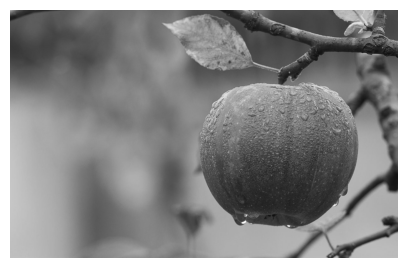

In [7]:
img = cv2.imread(r"C:\Users\Suyash Tambe\Desktop\FIPL VS CODE\gray.jpg")

plt.figure(figsize=(5,5))
plt.imshow(img,'gray')
plt.axis('off')



(-0.5, 1879.5, 1203.5, -0.5)

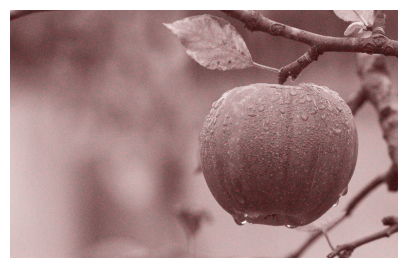

In [8]:
mean = 0
stddev = 100
noise = np.zeros(img.shape, np.uint8)
cv2.randn(noise,mean,stddev)
noisy_img = cv2.add(img, noise)


plt.figure(figsize=(5,5))
plt.imshow(noisy_img,'gray')
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


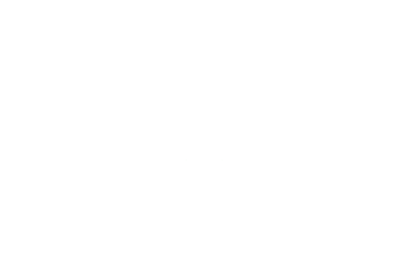

In [12]:
F_noisy=np.fft.fft2(noisy_img)
Fshift_noisy=np.fft.fftshift(F_noisy)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift_noisy)),cmap='gray')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


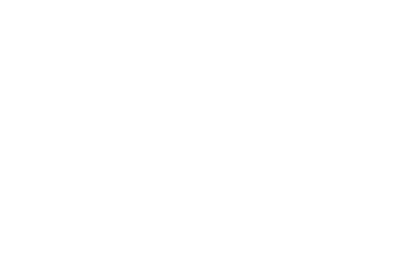

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


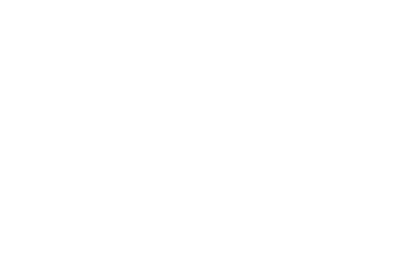

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F_noisy)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F_noisy)), cmap='gray')
plt.axis('off')
plt.show()

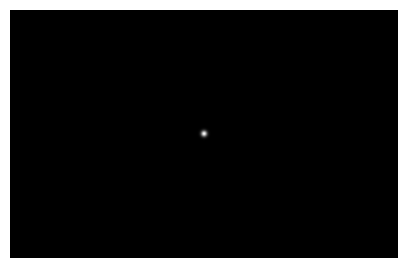

In [18]:
M, N = img.shape[:2]

H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))
        
plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


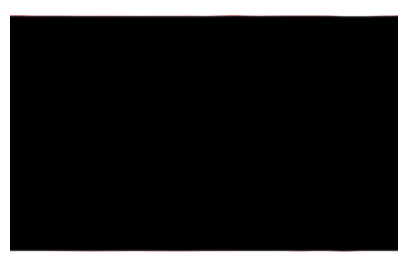

In [20]:
Gshift_LPF = Fshift_noisy * np.expand_dims(H, axis=-1)

# Gshift_LPF now has shape (1204, 1880, 3), representing the filtered frequency-domain image
G = np.fft.ifftshift(Gshift_LPF)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
HPF = 1 - H

F_LPF = np.fft2(g)
Fshift_LPF = np.fft.fftshift(F_LPF)

plt.figure(figsize=(5,5))
plt.imshow(np.log1l(np.log1p(np.abs(Fshift_LPF)), cmap='gray'))
plt.axis('off')
plt.show()

Gshift_HPF = Fshift_LPF * HPF
G = np.fft.ifftshift(Gshift_HPF)
g_HPF = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g_HPF, cmap='gray')
plt.axis('off')
plt.show()